In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data

path = r'C:\Users\jeong\OneDrive\Desktop\CF Files\Achievement 4\07-2023 Instacart Basket Analysis'

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated2.pkl'))

# .01 Creating Bar Charts

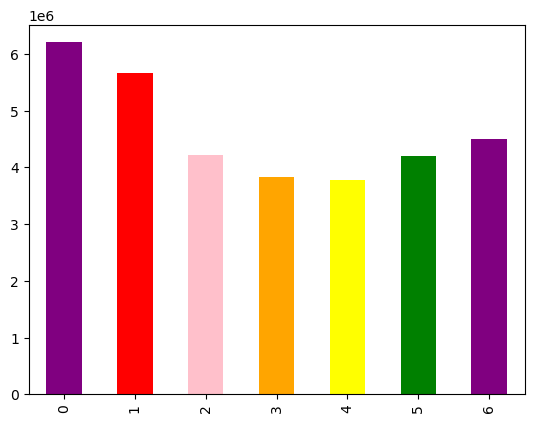

In [3]:
# Create bar chart

bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

In [4]:
# Export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# .02 Creating Histograms and Scatterplots


<Axes: ylabel='Frequency'>

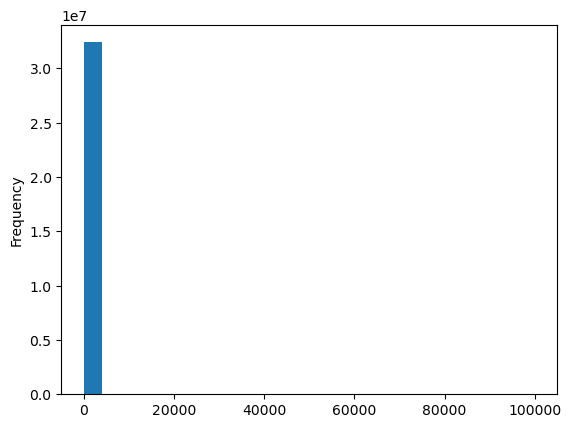

In [5]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [6]:
# Summary stats of 'price' column

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [7]:
# Look into the max price 

ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

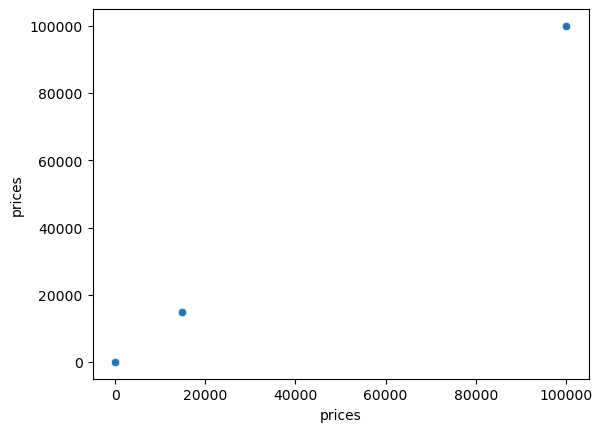

In [8]:
# Create scatterplot to visualize distribution and identify outliers

sns.scatterplot(x='prices', y='prices', data = ords_prods_merge)

In [9]:
# Check for outliers

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,fixed_prices,average_price,spending_flag,median_last_order,last_order_frequency
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,Regulary busy,Regulary busy,Average orders,40,Regular Customer,1.49,7.297891,Low spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Regulary busy,Regulary busy,Average orders,40,Regular Customer,1.49,7.297891,Low spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,Regulary busy,Regulary busy,Average orders,4,New customer,1.49,8.753077,Low spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Busiest day,Busiest days,Average orders,4,New customer,1.49,8.753077,Low spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Regulary busy,Busiest days,Average orders,16,Regular Customer,1.49,7.243094,Low spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,Busiest day,Busiest days,Average orders,39,Regular Customer,9.90,7.962637,Low spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,Busiest day,Busiest days,Average orders,39,Regular Customer,9.90,7.962637,Low spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,Regulary busy,Least busy,Average orders,15,Regular Customer,9.90,8.723894,Low spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,Regulary busy,Least busy,Average orders,12,Regular Customer,9.90,8.918713,Low spender,12.0,Regular customer


In [10]:
# Mark erroneous values as missing

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [11]:
# Check max price to see if marking was successful 

ords_prods_merge['prices'].max()

25.0

In [12]:
# Drop 'fixed_prices' column and use 'prices' column instead

ords_prods_merge = ords_prods_merge.drop(columns = ['fixed_prices'])

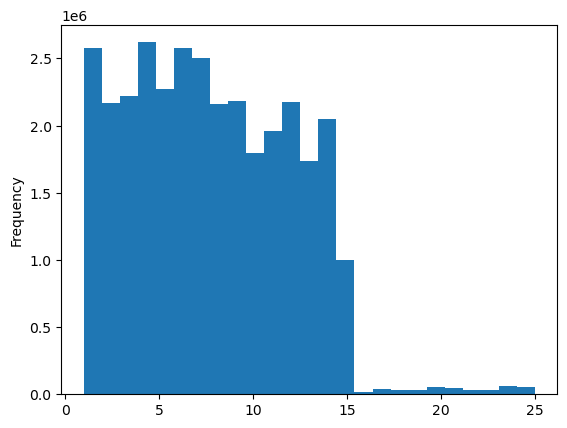

In [13]:
# Recreate histogram using updated 'prices' column

hist = ords_prods_merge['prices'].plot.hist(bins=25)

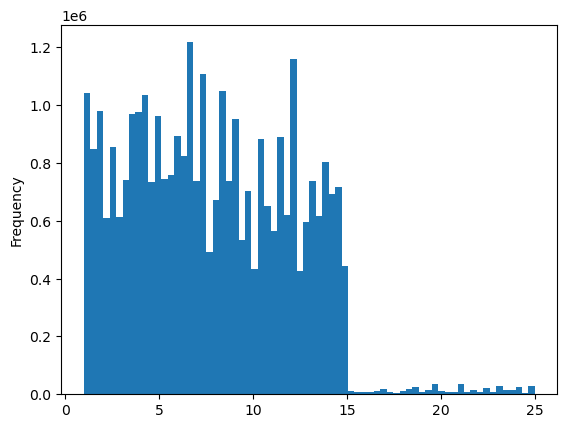

In [14]:
# Increase granuality by increasing # of bins

hist_2 = ords_prods_merge['prices'].plot.hist(bins=70)

In [15]:
# Export chart

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_25.png'))

In [16]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_70.png'))

# .03 Creating Line Charts

In [17]:
# Create sample with 70/30 split

np.random.seed(4)

In [18]:
# Create a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [19]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [20]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [21]:
# Check results

len(ords_prods_merge)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
# Speed up processing by reducing sample to only necessary columns

df_2 = small[['orders_day_of_the_week', 'prices']]

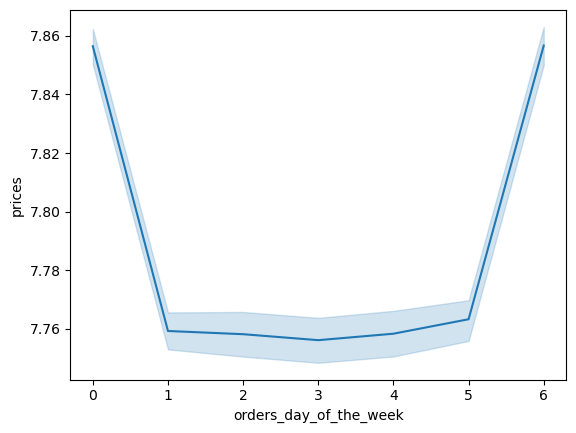

In [24]:
# Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

In [25]:
# Export line plot

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ord_dow.png'))

In [26]:
# Export dataframe


ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated3.pkl'))